In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
bank=pd.read_csv("bank.csv")

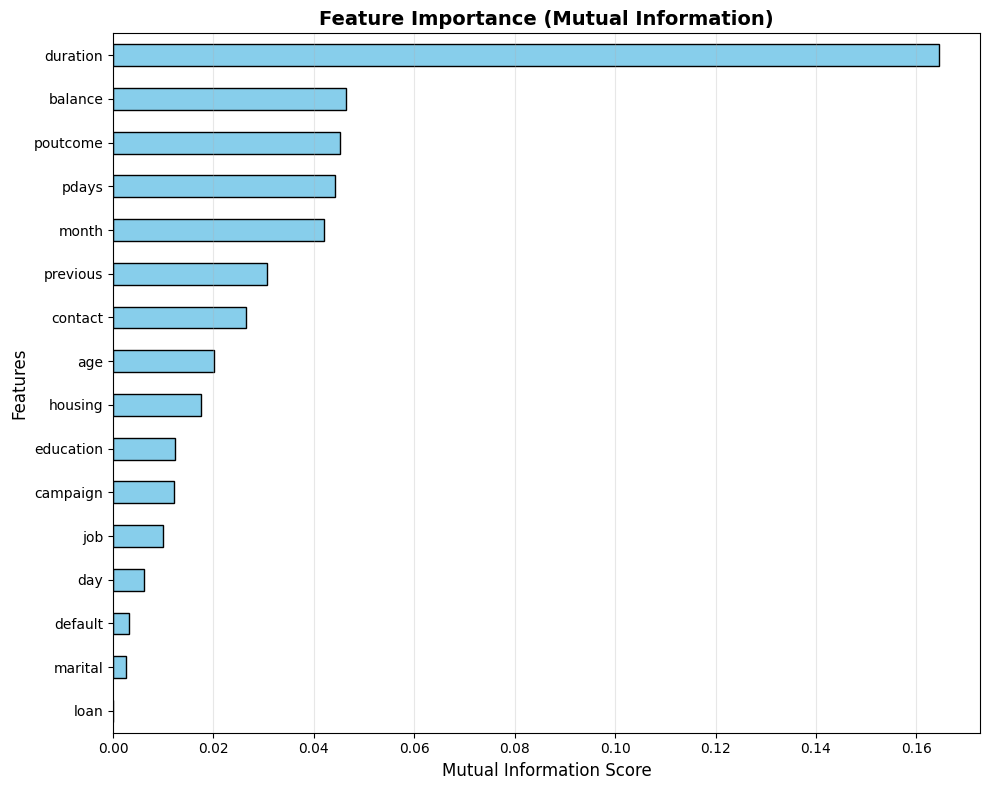

In [8]:
# Feature importance analysis using mutual information


# Create a copy of x for preprocessing
# x=bank.copy()
X_encoded = bank.copy()
y = X_encoded['deposit']
X_encoded.drop('deposit', axis=1, inplace=True)


# Encode categorical variables for mutual information calculation
label_encoders = {}
categorical_columns = X_encoded.select_dtypes(include=['object']).columns



for col in categorical_columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
    label_encoders[col] = le
   

# Encode target variable
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

importance_scores = mutual_info_classif(X_encoded, y_encoded, random_state=42)

# Create feature importance series with proper column names
feat_importance = pd.Series(importance_scores, index=X_encoded.columns)
feat_importance = feat_importance.sort_values(ascending=True)

# Display feature importance plot
plt.figure(figsize=(10, 8))
feat_importance.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Feature Importance (Mutual Information)', fontsize=14, fontweight='bold')
plt.xlabel('Mutual Information Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()




In [9]:
bank.drop('loan', axis=1, inplace=True)

In [10]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [11]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = bank.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    bank[col] = label_encoder.fit_transform(bank[col])

numerical_cols = bank.select_dtypes(include=[np.number]).columns
categorical_cols = bank.select_dtypes(include=['object']).columns

print(f"\nNumerical columns: {list(numerical_cols)}")
print(f"Categorical columns: {list(categorical_cols)}")


Numerical columns: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']
Categorical columns: []


                age       job   marital  education   default   balance  \
age        1.000000 -0.031603 -0.442782  -0.126018 -0.011425  0.112300   
job       -0.031603  1.000000  0.078314   0.147046 -0.007066  0.028736   
marital   -0.442782  0.078314  1.000000   0.125845 -0.014691 -0.002138   
education -0.126018  0.147046  0.125845   1.000000 -0.010709  0.051728   
default   -0.011425 -0.007066 -0.014691  -0.010709  1.000000 -0.060954   
balance    0.112300  0.028736 -0.002138   0.051728 -0.060954  1.000000   
housing   -0.168700 -0.136965 -0.036345  -0.109168  0.011076 -0.077092   
contact    0.027762 -0.087915 -0.060456  -0.132540  0.035709 -0.027295   
day       -0.000762  0.026589 -0.003642   0.016759  0.017342  0.010467   
month     -0.026130 -0.076011 -0.004070  -0.055868  0.000950  0.007264   
duration   0.000189  0.002432  0.006781  -0.019122 -0.009760  0.022436   
campaign  -0.005278  0.003104 -0.030794  -0.005327  0.030975 -0.013894   
pdays      0.002774 -0.003385  0.03120

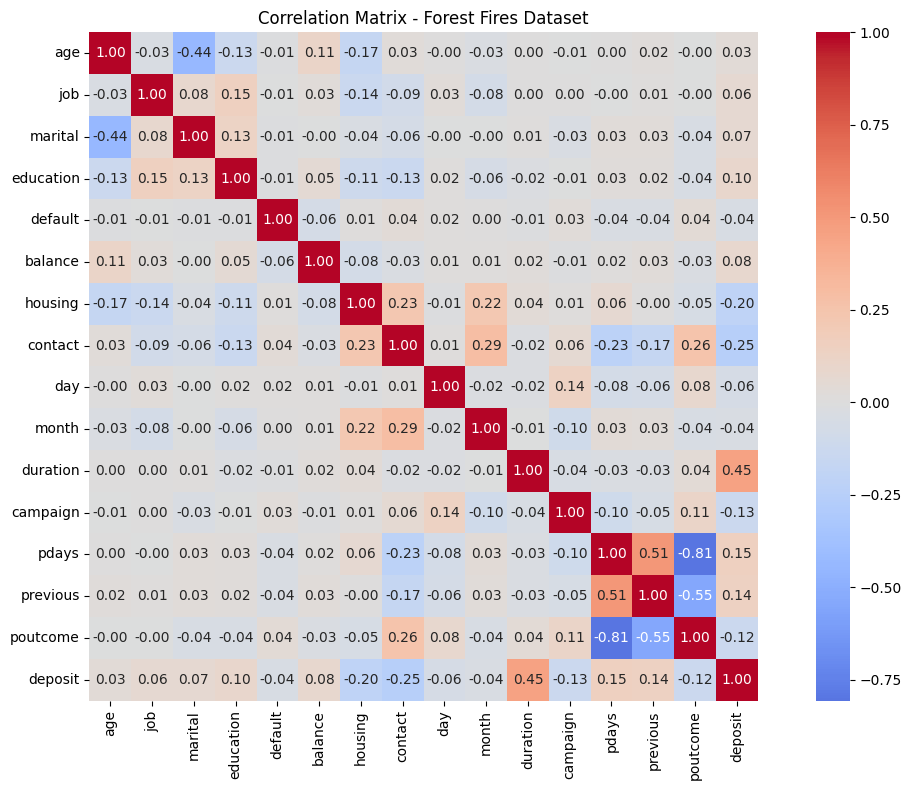

In [12]:
corr = bank.corr()
print(corr)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.2f')
plt.title('Correlation Matrix - Forest Fires Dataset')
plt.tight_layout()
plt.show()

In [13]:
# Quick Summary: Which columns need normalization?
bank_temp = bank

# Apply normalization criteria
needs_norm = []
no_norm = []

for col in numerical_cols:
    col_range = bank_temp[col].max() - bank_temp[col].min()
    col_max = bank_temp[col].max()
    col_std = bank_temp[col].std()
    
    # Column needs normalization if:
    # - Large range (>100) OR Large max value (>100) OR High std (>50)
    # - AND not already normalized (0-1)
    
    if col_max <= 1 and bank_temp[col].min() >= 0:
        no_norm.append(col)
    elif col_range > 100 or col_max > 100 or col_std > 50:
        needs_norm.append(col)
    else:
        no_norm.append(col)

print(f"🔄 COLUMNS THAT NEED NORMALIZATION ({len(needs_norm)}):")
print("=" * 40)
for col in needs_norm:
    print(f"   ✓ {col}")
    print(f"      Range: {bank_temp[col].min():.2f} to {bank_temp[col].max():.2f}")

print(f"\n✅ COLUMNS THAT DON'T NEED NORMALIZATION ({len(no_norm)}):")
print("=" * 40)
for col in no_norm:
    print(f"   • {col}")

print(f"\n💡 FOR YOUR BANK DATASET, TYPICALLY NEED NORMALIZATION:")
print("   • 'age' - ranges from ~18 to 90+")
print("   • 'balance' - can be large negative to large positive")
print("   • 'duration' - call duration in seconds (wide range)")
print("   • 'campaign' - number of contacts (varies)")
print("   • 'pdays' - days since last contact (large values)")
print("   • 'previous' - number of previous contacts")

print(f"\n🔧 HOW TO NORMALIZE:")
print("   from sklearn.preprocessing import StandardScaler")
print("   scaler = StandardScaler()")
print(f"   bank[{needs_norm}] = scaler.fit_transform(bank[{needs_norm}])")

print(f"\n⚠️ REMEMBER:")
print("   • Normalize NUMERICAL columns only")
print("   • Categorical columns need ENCODING (not normalization)")
print("   • Apply normalization BEFORE splitting train/test")

🔄 COLUMNS THAT NEED NORMALIZATION (3):
   ✓ balance
      Range: -6847.00 to 81204.00
   ✓ duration
      Range: 2.00 to 3881.00
   ✓ pdays
      Range: -1.00 to 854.00

✅ COLUMNS THAT DON'T NEED NORMALIZATION (13):
   • age
   • job
   • marital
   • education
   • default
   • housing
   • contact
   • day
   • month
   • campaign
   • previous
   • poutcome
   • deposit

💡 FOR YOUR BANK DATASET, TYPICALLY NEED NORMALIZATION:
   • 'age' - ranges from ~18 to 90+
   • 'balance' - can be large negative to large positive
   • 'duration' - call duration in seconds (wide range)
   • 'campaign' - number of contacts (varies)
   • 'pdays' - days since last contact (large values)
   • 'previous' - number of previous contacts

🔧 HOW TO NORMALIZE:
   from sklearn.preprocessing import StandardScaler
   scaler = StandardScaler()
   bank[['balance', 'duration', 'pdays']] = scaler.fit_transform(bank[['balance', 'duration', 'pdays']])

⚠️ REMEMBER:
   • Normalize NUMERICAL columns only
   • Categoric

In [14]:
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StanderScaler
bank[["balance", "duration","pdays"]] = MinMaxScaler().fit_transform(bank[["balance", "duration","pdays"]])

In [15]:
bank.describe()

,age,job,marital,education,default,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,4.487905,1.199337,1.285164,0.015051,0.095121,0.473123,0.489697,15.658036,5.445709,0.095384,2.508421,0.061205,0.832557,2.477782,0.473840
std,11.913369,3.225132,0.625552,0.749478,0.121761,0.036631,0.499299,0.818724,8.420740,3.191939,0.089489,2.722077,0.127203,2.292007,1.002952,0.499338
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,0.079147,0.000000,0.000000,8.000000,3.000000,0.035061,1.000000,0.000000,0.000000,2.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,0.084008,0.000000,0.000000,15.000000,6.000000,0.065223,2.000000,0.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,0.097160,1.000000,1.000000,22.000000,8.000000,0.127352,3.000000,0.025439,1.000000,3.000000,1.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,31.000000,11.000000,1.000000,63.000000,1.000000,58.000000,3.000000,1.000000


In [16]:
y = bank['deposit']
x = bank.drop('deposit', axis=1 , inplace=True)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(bank,y,test_size=0.2, random_state=0,shuffle=True)

In [18]:
X_train.shape

(8929, 15)

In [19]:
# Fix convergence warning by increasing max_iter and scaling
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=10000)
LR.fit(X_train,y_train) 

LogisticRegression(max_iter=10000)

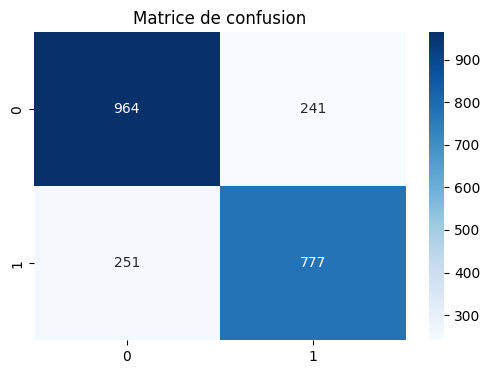

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1205
           1       0.76      0.76      0.76      1028

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233



In [20]:
y_predictLR = LR.predict(X_test) # tester le modèle sur de nouvelles observations

from sklearn.metrics import classification_report, confusion_matrix

# Matrice de confusion
cm = confusion_matrix(y_test, y_predictLR)

# Affichage de la matrice de confusion avec seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.show()

# Rapport de classification
print(classification_report(y_test, y_predictLR))



In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5) 

In [35]:
# Fix: Use binary target variable for classification
knn.fit(X_train, y_train)

y_predict_knn = knn.predict(X_test)


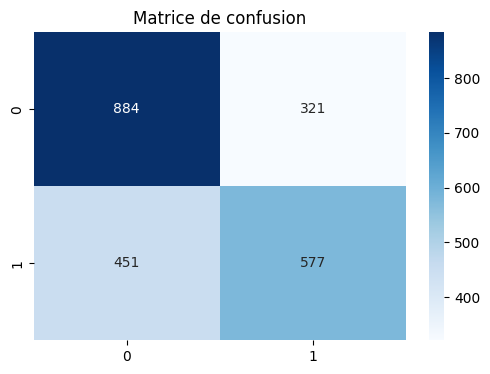

              precision    recall  f1-score   support

           0       0.66      0.73      0.70      1205
           1       0.64      0.56      0.60      1028

    accuracy                           0.65      2233
   macro avg       0.65      0.65      0.65      2233
weighted avg       0.65      0.65      0.65      2233



In [36]:
from sklearn.metrics import classification_report, confusion_matrix

# Matrice de confusion
cm = confusion_matrix(y_test, y_predict_knn)

# Affichage de la matrice de confusion avec seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.show()

# Rapport de classification
print(classification_report(y_test, y_predict_knn))


In [37]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors' : [1,3,5,7,9,11,13]}

model = KNeighborsClassifier()

clf = GridSearchCV(model,parameters, scoring='recall', cv=5)

grille = clf.fit(X_train,y_train)

print(grille.best_params_)
print(grille.best_score_)

{'n_neighbors': 1}
0.5749825250840723


In [38]:
Best_KNN = KNeighborsClassifier(n_neighbors = 1)
Best_KNN.fit(X_train,y_train)
knn_pred = Best_KNN.predict(X_test)

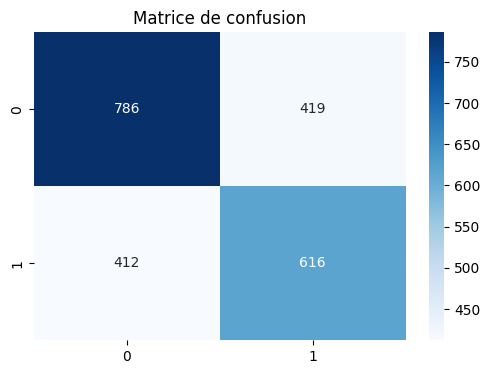

              precision    recall  f1-score   support

           0       0.66      0.65      0.65      1205
           1       0.60      0.60      0.60      1028

    accuracy                           0.63      2233
   macro avg       0.63      0.63      0.63      2233
weighted avg       0.63      0.63      0.63      2233



In [39]:
from sklearn.metrics import classification_report, confusion_matrix

# Matrice de confusion
cm = confusion_matrix(y_test, knn_pred )

# Affichage de la matrice de confusion avec seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.show()

# Rapport de classification
print(classification_report(y_test, knn_pred ))

## Support Vector Classifier

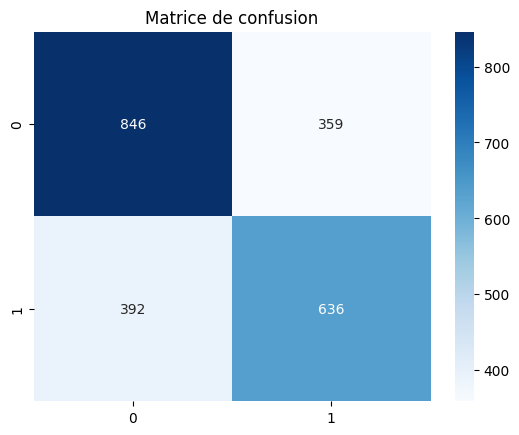

classification_report :                precision    recall  f1-score   support

           0       0.68      0.70      0.69      1205
           1       0.64      0.62      0.63      1028

    accuracy                           0.66      2233
   macro avg       0.66      0.66      0.66      2233
weighted avg       0.66      0.66      0.66      2233



In [40]:
from sklearn.svm import SVC 

SVC_model = SVC()
SVC_model.fit(X_train, y_train)

SVC_predict = SVC_model.predict(X_test)
cm = confusion_matrix(y_test, SVC_predict)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.show()

print("classification_report : ",classification_report(y_test, SVC_predict)) 

In [41]:
#find best hyper parameters
from sklearn.model_selection import GridSearchCV

SVC_RBF = SVC() # mosèle SVM non linéaire 

param_grid = {'C':[1, 10, 100],'gamma':[0.01, 0.1, 1], 'kernel':['rbf']}  # on a défint les hyperparamètres 

grid = GridSearchCV(SVC_RBF, param_grid, cv=5, scoring='recall')

grid.fit(X_train,y_train)

grid.best_params_

KeyboardInterrupt: 

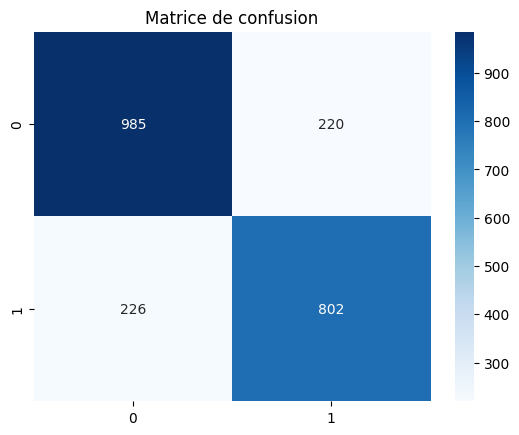

classification_report :                precision    recall  f1-score   support

           0       0.81      0.82      0.82      1205
           1       0.78      0.78      0.78      1028

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233



In [ ]:
# Best model
best_SVC_RBF = SVC(C=100, gamma=0.01)
best_SVC_RBF.fit(X_train, y_train)

SVC_predict_BestModel_RBF = best_SVC_RBF.predict(X_test)

cm = confusion_matrix(y_test, SVC_predict_BestModel_RBF)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.show()

print("classification_report : ",classification_report(y_test, SVC_predict_BestModel_RBF)) 

In [ ]:
#tester kernel poly pour différents dégré 
#find best hyper parameters

SVC_poly = SVC()
param_grid_poly = {'C':[0.1, 1, 10, 100],'degree': [2,3,4], 'kernel':['poly']}

grid_poly = GridSearchCV(SVC_poly,param_grid_poly, cv=5, scoring='recall')
grid_poly.fit(X_train,y_train)

grid_poly.best_params_

In [1]:
# Best model
best_SVC_Poly = SVC(C=100, degree=4)
best_SVC_Poly.fit(X_train, y_train)

SVC_predict_BestModel_Poly= best_SVC_Poly.predict(X_test)

print(classification_report(y_test, SVC_predict_BestModel_Poly))
print(confusion_matrix(y_test, SVC_predict_BestModel_Poly))

NameError: name 'SVC' is not defined

## Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [43]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
y_pred_dt = dt.predict(X_test)

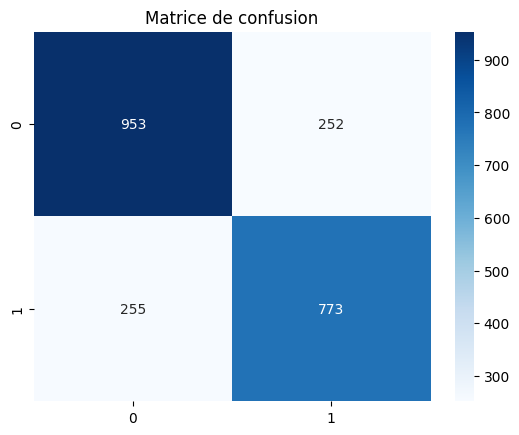

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1205
           1       0.75      0.75      0.75      1028

    accuracy                           0.77      2233
   macro avg       0.77      0.77      0.77      2233
weighted avg       0.77      0.77      0.77      2233



In [46]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred_dt)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.show()
print(classification_report(y_test,y_pred_dt))


In [47]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier() 

tree_params = {'max_depth': range(1,4), 'max_features': range(3,6), 'criterion': ['gini','entropy']}

tree_classifier = GridSearchCV(tree, tree_params, cv=5, scoring='recall')

tree_classifier.fit(X_train, y_train)

tree_classifier.best_params_, tree_classifier.best_score_


({'criterion': 'gini', 'max_depth': 2, 'max_features': 4},
 np.float64(0.8385323272184886))

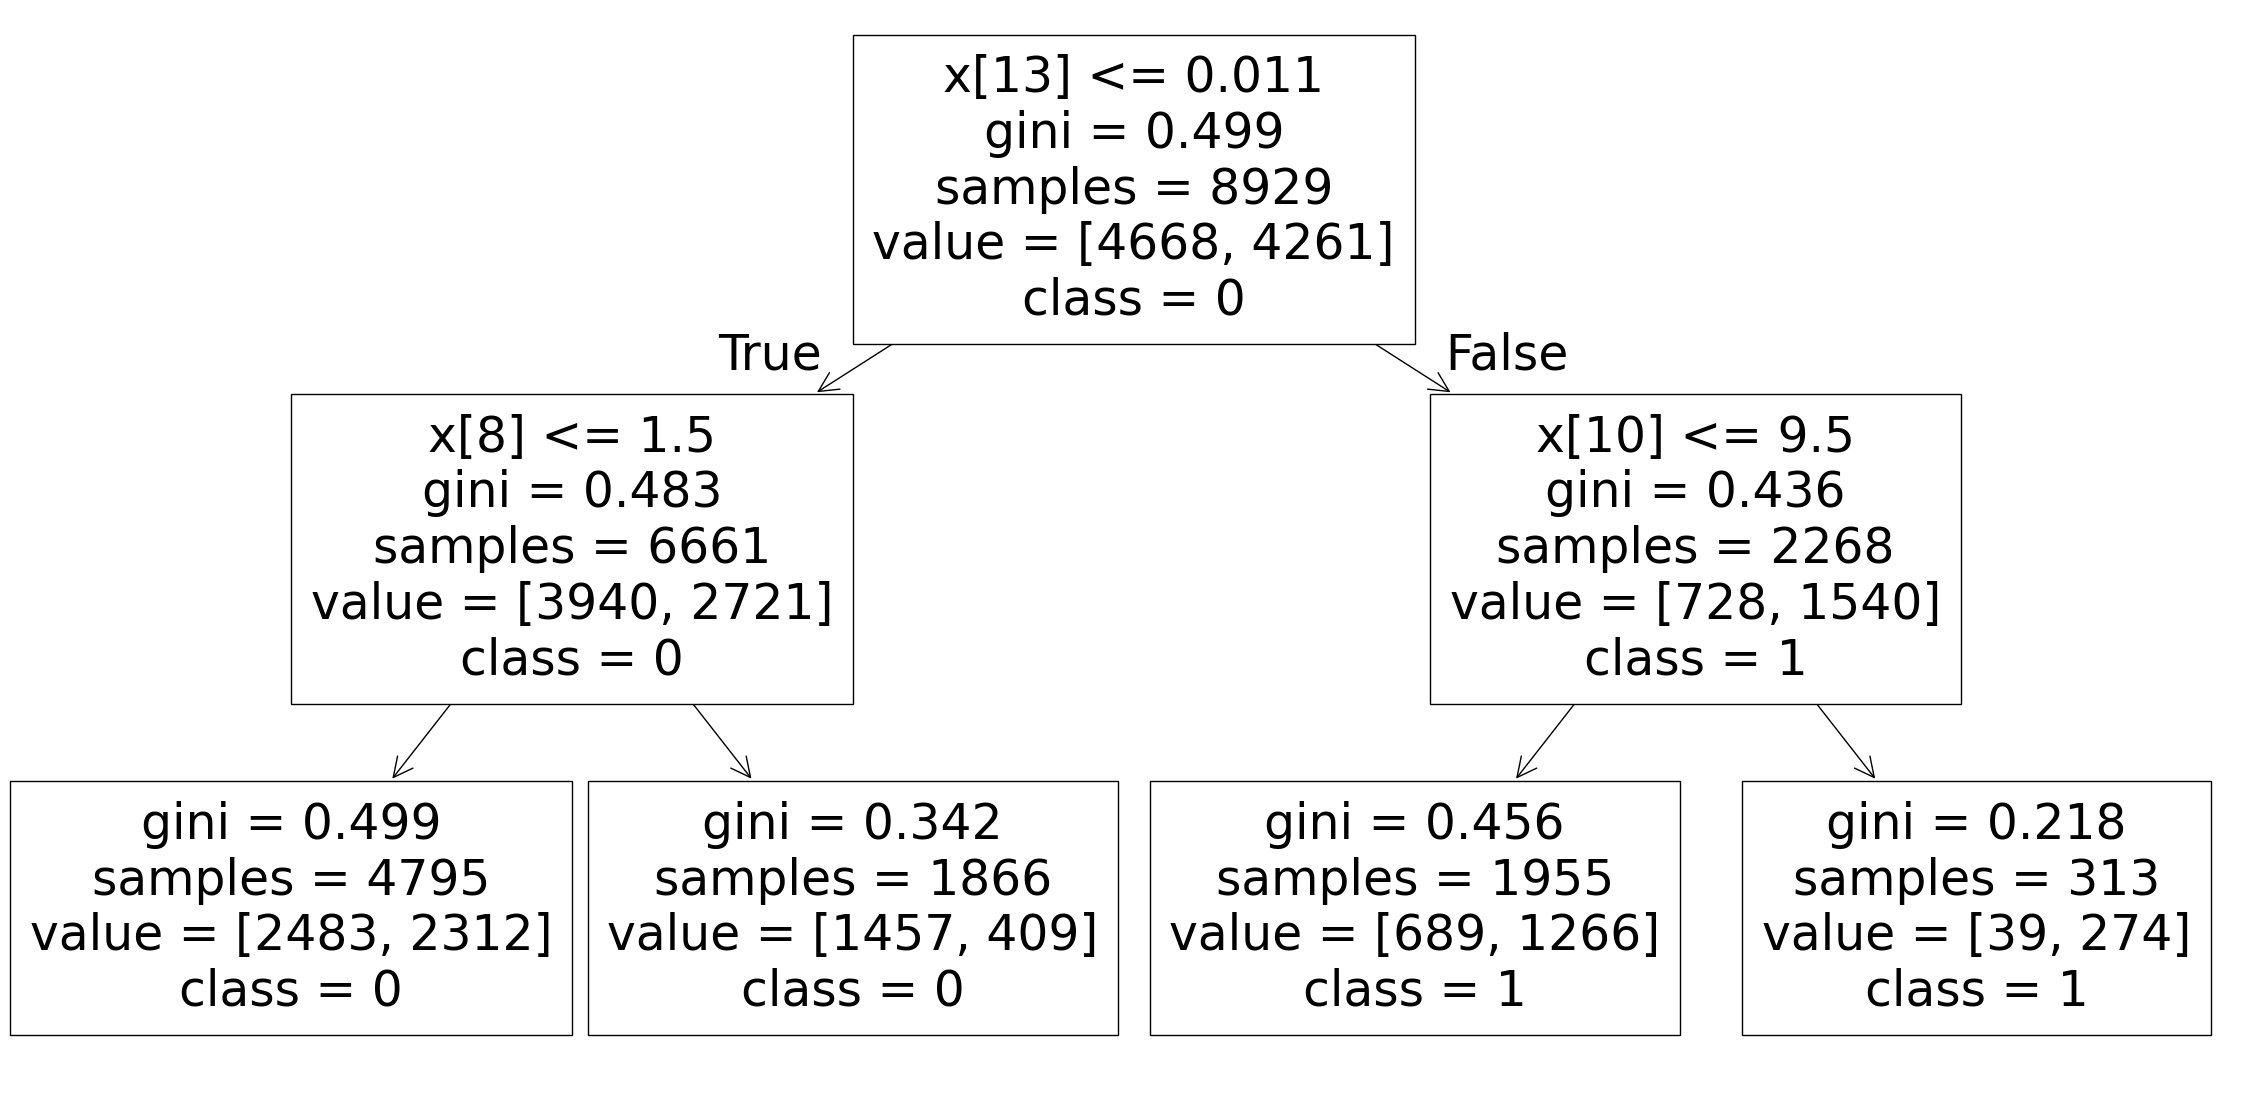

In [48]:
from sklearn import tree    
from sklearn.tree import plot_tree 

plt.figure(figsize=(29,14))     
plot_tree(tree_classifier.best_estimator_, class_names = ['0', '1'])
   
plt.show()

##  Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)

In [50]:
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

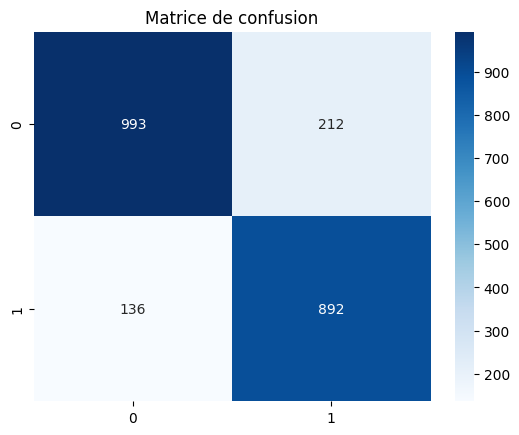

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1205
           1       0.81      0.87      0.84      1028

    accuracy                           0.84      2233
   macro avg       0.84      0.85      0.84      2233
weighted avg       0.85      0.84      0.84      2233



In [51]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.show()
print(classification_report(y_test,y_pred_rf))

In [52]:
# Number of trees in random forest
n_estimators = [200, 300, 400, 500]
# Number of features to consider at every split
max_features = [3, 4, 5, 6] 
# Maximum number of levels in tree
max_depth = [2, 3, 4, 5] 
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [200, 300, 400, 500], 'max_features': [3, 4, 5, 6], 'max_depth': [2, 3, 4, 5], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [53]:
grid_search = GridSearchCV(rf, param_grid, cv = 3, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 5,
 'max_features': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 400}